# はじめに
今回は、Bank Marketing Datasetを使って、

- DataFramesでの集計とplot
- 機械学習の初歩

を試してみましょう。

最初に下記からデータを取得して、bank.csv, bank-full.csvをJuliaBoxに用意しておいてください。

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# DataFrameを試してみよう
ここでは、DataFrameを試してみます。

DataFrameとは、構造化されたデータを扱うのに便利なデータ構造です。
今回はSQLっぽく処理をする流れを体験します。

[公式ドキュメント](http://dataframesjl.readthedocs.org/en/latest/)は若干不親切なので、
weda_654さんの[スライド](http://www.slideshare.net/weda654/data-frame)がわかりやすいです。

In [1]:
using DataFrames

In [2]:
table = readtable("bank.csv",  separator=';')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
7,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
8,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
10,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


## DataFramesMetaの導入
`DataFrames`をより便利に使うために、[DataFramesMeta](https://github.com/JuliaStats/DataFramesMeta.jl)を使いましょう。
これを使うと、よりPandasっぽい（あるいはSQL likeな）便利な書き方ができるようになります。

In [3]:
Pkg.add("DataFramesMeta")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DataFramesMeta
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [4]:
using DataFramesMeta

In [5]:
x_thread = @linq table |> 
    where(:age .> 60) |>
    where(:housing .== "yes") |>
    orderby(:job)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
2,61,blue-collar,married,primary,no,625,yes,no,unknown,19,may,158,2,-1,0,unknown,no
3,65,housemaid,married,primary,no,2179,yes,no,cellular,4,sep,112,7,-1,0,unknown,no
4,66,management,married,tertiary,no,1048,yes,no,cellular,23,jun,971,2,-1,0,unknown,no
5,63,retired,married,secondary,no,415,yes,no,cellular,7,oct,323,1,-1,0,unknown,no
6,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
7,63,retired,married,tertiary,no,133,yes,no,cellular,13,feb,104,2,-1,0,unknown,no
8,71,retired,married,tertiary,no,14220,yes,no,cellular,9,sep,397,1,-1,0,unknown,yes
9,61,retired,married,primary,no,1060,yes,no,unknown,13,may,118,1,-1,0,unknown,no
10,68,retired,married,secondary,no,19317,yes,no,cellular,4,aug,249,1,-1,0,unknown,yes


In [6]:
age_balance = @linq table |> 
    where(:age .> 60) |>
    where(:housing .== "yes") |>
    select(:age, :balance)

,age,balance
1,61,4629
2,63,415
3,75,3810
4,66,1048
5,61,625
6,63,133
7,71,14220
8,61,1060
9,65,2179
10,68,19317


In [7]:
using Gadfly

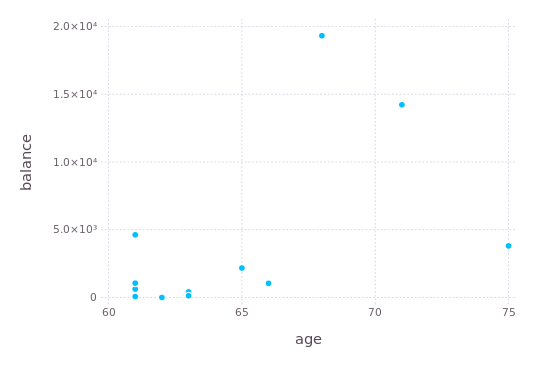

In [8]:
plot(age_balance, x=:age, y=:balance, Geom.point)

# DataFrameでMachine Learning

（メンテナー絶賛募集中の）SVM.jlを使って機械学習を試してみましょう

In [9]:
bank = readtable("bank-full.csv",  separator = ';')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## 目的変数をFloatに変換する

In [10]:
bank[:y] = [y == "yes" ? 1.0  : -1.0  for y in bank[:y]]

45211-element Array{Float64,1}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮  
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0

## カテゴリ変数をダミー変数に変換


julia-users MLのコードを使わせてもらう

https://groups.google.com/d/msg/julia-users/7-Vtpi8w4YI/KvMlKAZSwDkJ

In [11]:
categorical_keys = [:job, :marital, :education, :default, :housing, :loan, :contact, :month, :poutcome]

9-element Array{Symbol,1}:
 :job      
 :marital  
 :education
 :default  
 :housing  
 :loan     
 :contact  
 :month    
 :poutcome 

In [12]:
numerical_keys = setdiff(names(bank), [categorical_keys, :y])

7-element Array{Symbol,1}:
 :age     
 :balance 
 :day     
 :duration
 :campaign
 :pdays   
 :previous

In [13]:
bank_normalized = deepcopy(bank)
bank_normalized[numerical_keys]

,age,balance,day,duration,campaign,pdays,previous
1,58,2143,5,261,1,-1,0
2,44,29,5,151,1,-1,0
3,33,2,5,76,1,-1,0
4,47,1506,5,92,1,-1,0
5,33,1,5,198,1,-1,0
6,35,231,5,139,1,-1,0
7,28,447,5,217,1,-1,0
8,42,2,5,380,1,-1,0
9,58,121,5,50,1,-1,0
10,43,593,5,55,1,-1,0


In [14]:
for key in numerical_keys
    bank_normalized[key] = (bank[:, key] - mean(bank[key])) / std(bank[key])
end

In [15]:
bank_normalized[numerical_keys]

,age,balance,day,duration,campaign,pdays,previous
1,1.6069471864824068,0.25641641627596995,-1.2984619713129057,0.011015976074886151,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
2,0.28852607995632196,-0.437889851794998,-1.2984619713129057,-0.41612235524730484,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
3,-0.7473762180284589,-0.4467575288233406,-1.2984619713129057,-0.7073530356942532,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
4,0.5710448884976258,0.04720492490359217,-1.2984619713129057,-0.6452238238655709,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
5,-0.7473762180284589,-0.44708596130587175,-1.2984619713129057,-0.2336177955005505,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
6,-0.5590303456675897,-0.3715464903236945,-1.2984619713129057,-0.4627192641188166,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
7,-1.218240898930632,-0.3006050740969542,-1.2984619713129057,-0.15983935645399025,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
8,0.10018020759545271,-0.4467575288233406,-1.2984619713129057,0.47310198905071094,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
9,1.6069471864824068,-0.40767406340212714,-1.2984619713129057,-0.808313004915862,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734
10,0.19435314377588733,-0.25265393164739824,-1.2984619713129057,-0.7888976262193987,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734


In [16]:
function getdummy{R}(df::DataFrame, cname::Symbol, ::Type{R})
    darr = df[cname]
    vals = sort(levels(darr))[2:end]
    namedict = Dict(vals, 1:length(vals))    
    arr = zeros(R, length(darr), length(namedict))
    for i=1:length(darr)
        if haskey(namedict, darr[i])
            arr[i, namedict[darr[i]]] = 1
        end         
    end
    newdf = convert(DataFrame, arr)
    names!(newdf, [symbol("$(cname)_$k") for k in vals])
    return newdf
end

function convertdummy{R}(df::DataFrame, cnames::Array{Symbol}, ::Type{R})
    # consider every variable from cnames as categorical
    # and convert them into set of dummy variables,
    # return new dataframe
    newdf = DataFrame()
    for cname in names(df)
        if !in(cname, cnames)
            newdf[cname] = df[cname]
        else
            dummydf = getdummy(df, cname, R)
            for dummyname in names(dummydf)
                newdf[dummyname] = dummydf[dummyname]
            end
        end
    end
    return newdf
end

convertdummy(df::DataFrame, cnames::Array{Symbol}) = convertdummy(df, cnames, Int32)

convertdummy (generic function with 2 methods)

In [17]:
bank_dummy = convertdummy(bank_normalized[:, 1:16], categorical_keys)

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,balance,housing_yes,loan_yes,contact_telephone,contact_unknown,day,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,duration,campaign,pdays,previous,poutcome_other,poutcome_success,poutcome_unknown
1,1.6069471864824068,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.25641641627596995,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,0.011015976074886151,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
2,0.28852607995632196,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,-0.437889851794998,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.41612235524730484,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
3,-0.7473762180284589,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,-0.4467575288233406,1,1,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.7073530356942532,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
4,0.5710448884976258,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.04720492490359217,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.6452238238655709,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
5,-0.7473762180284589,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,-0.44708596130587175,0,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.2336177955005505,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
6,-0.5590303456675897,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,-0.3715464903236945,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.4627192641188166,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
7,-1.218240898930632,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,-0.3006050740969542,1,1,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.15983935645399025,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
8,0.10018020759545271,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.4467575288233406,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,0.47310198905071094,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
9,1.6069471864824068,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.40767406340212714,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.808313004915862,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1
10,0.19435314377588733,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,-0.25265393164739824,1,0,0,1,-1.2984619713129057,0,0,0,0,0,0,0,1,0,0,0,-0.7888976262193987,-0.5693443410168078,-0.4114485561028586,-0.25193758438383734,0,0,1


In [18]:
X = convert(Array, bank_dummy[:, 1:42])'

42x45211 Array{Real,2}:
  1.60695    0.288526  -0.747376  …  2.92537    1.51277   -0.370684
  0          0          0            0          1          0       
  0          0          1            0          0          1       
  0          0          0            0          0          0       
  1          0          0            0          0          0       
  0          0          0         …  1          0          0       
  0          0          0            0          0          0       
  0          0          0            0          0          0       
  0          0          0            0          0          0       
  0          1          0            0          0          0       
  0          0          0         …  0          0          0       
  0          0          0            0          0          0       
  1          0          1            1          1          1       
  ⋮                               ⋱                        ⋮       
  0          0          

In [19]:
Y = convert(Array, bank_normalized[:y])

45211-element Array{Float64,1}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮  
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0

In [20]:
attribute_num, sample_num = size(X)

(42,45211)

In [21]:
train_flags = randbool(sample_num)

45211-element BitArray{1}:
 false
  true
 false
 false
  true
 false
  true
  true
 false
  true
  true
 false
 false
     ⋮
 false
  true
  true
 false
 false
 false
 false
 false
  true
 false
  true
  true

In [22]:
using SVM
model_svm = svm(X[:, train_flags], Y[train_flags])

Fitted linear SVM
 * Non-zero weights: 41
 * Iterations: 100
 * Converged: true


 in show at /home/juser/.julia/v0.3/SVM/src/SVM.jl:15
 in anonymous at show.jl:1159
 in with_output_limit at ./show.jl:1136
 in showlimited at show.jl:1158
 in writemime at replutil.jl:2
 in writemime at multimedia.jl:41
 in sprint at iostream.jl:229
 in display_dict at /home/juser/.julia/v0.3/IJulia/src/execute_request.jl:25
 in execute_request_0x535c5df2 at /home/juser/.julia/v0.3/IJulia/src/execute_request.jl:196
 in eventloop at /home/juser/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340


In [23]:
accuracy = countnz(predict(model_svm, X[:, ~train_flags]) .== Y[~train_flags]) / countnz(~train_flags)

0.8872026979055733

# 参考文献
- [Juliaによる予測モデル構築・評価](http://www.slideshare.net/sfchaos/julia-47433829)  (@sfchaos)
- Inspired by [メキメキ開発の進む Apache Sparkのいまとこれから （Spark Casual Talk #1 発表資料）](http://www.slideshare.net/hadoopxnttdata/nttdata-spark-casual-talk-1) (猿田, 土橋)
